In [3]:
# clustering
# * 데이터의 grouping

# 1. randomly k개의 점을 찍는다
# 2. 모든 점과 k와의 거리를 계산한다
# 3. 모든 점을 k와의 거리를 기반으로 grouping한다.
# 4. 점 k를 각 group의 중심으로 이동한다
# 5. 2번 이후를 반복한다
# 6. 더 이상 그룹이나 점의 이동이 없을 때 중지한다

# 대표적인 알고리즘 - 거리기반
# 1. kmeans - 거리기반 군집화
# 2. hierachical - 계층적 군집화
# 3. dbscan - 밀도기반 군집화

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### kmeans

In [4]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples = 150,
                 n_features = 2,
                 centers = 3,
                 shuffle=True,
                 random_state=0)

In [13]:
x[:5]

array([[ 3.15492712,  1.55292739],
       [ 0.08848433,  2.32299086],
       [ 0.62835793,  4.4601363 ],
       [ 0.08080352,  4.69068983],
       [ 3.18190344, -0.18226785]])

In [8]:
x.shape

(150, 2)

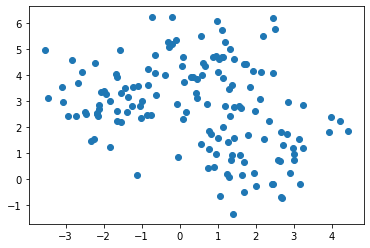

In [12]:
plt.scatter(x[:,0], x[:,1])

In [14]:
y  # 각 sample 데이터가 어느 group에 속했는지 label

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1])

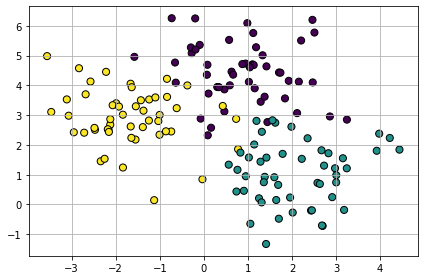

In [16]:
plt.scatter(x[:,0], x[:,1], c=y, marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

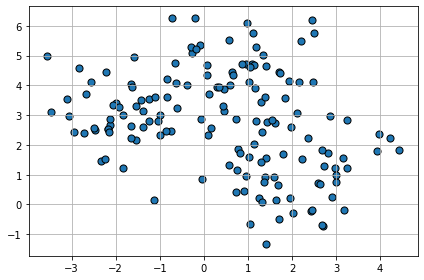

In [17]:
plt.scatter(x[:,0], x[:,1], marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

In [18]:
from sklearn.cluster import KMeans

In [21]:
km = KMeans(n_clusters=3,
      init='random',
      max_iter = 300,
      random_state=0)

In [22]:
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

In [28]:
y_gr = km.predict(x)
y_gr

array([2, 0, 1, 1, 2, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2,
       1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2,
       2, 2, 0, 2, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 0,
       0, 2, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1,
       0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 2, 2, 1, 0, 0, 0, 2, 2])

In [66]:
x[y_gr==0][:, 0]

# x[y_gr==0, 0]



array([ 0.08848433, -2.71576327, -2.16434104, -2.47135027, -1.42917905,
       -1.65978459, -1.00583914, -3.55758848, -1.66285371, -2.12422008,
       -0.74057605, -1.99049999, -1.83591698, -0.83536526, -0.86052093,
       -1.37039748, -0.83708585, -3.10984241, -1.83779018, -1.54392443,
       -1.57671974, -2.34026827, -1.24056032, -0.07228289, -2.06976549,
       -2.57215738, -2.48284901, -2.68308645, -2.83343086, -1.92635304,
       -1.10064528, -1.00301299, -3.46318382, -1.03316224, -2.12321805,
       -0.63762777, -1.55123014, -3.06770103, -1.38495085, -1.24697941,
       -0.61672511, -1.64506806, -1.63744467,  0.1631238 , -2.1793126 ,
       -2.15499157, -2.95096492, -2.21895386, -2.25250139])

In [30]:
x[y_gr==1, 0]

array([ 0.62835793,  0.08080352,  2.20656076,  2.50904929,  2.46452227,
        0.4666179 , -0.65392827,  0.30380963,  1.28933778,  1.12031365,
        1.44193252, -0.27652528,  0.34194798,  1.33263648, -0.29421492,
        1.9263585 , -0.09448254,  1.18454506,  0.46546494,  1.70536064,
        0.4290083 ,  1.15369622,  0.73240494,  1.10318217,  1.19404184,
       -0.73000011,  2.11567076, -0.19685333,  0.66471755,  2.15504965,
        0.94808785,  1.42013331,  1.0220286 ,  0.57309313,  1.1312175 ,
        2.47034915,  0.87305123, -0.18887976,  0.58894326,  0.9867701 ,
        1.0427873 ,  1.84070628,  0.10547293,  0.06897171,  1.55723507,
        1.7373078 ,  1.37861172, -0.37457245])

In [31]:
km.cluster_centers_

array([[-1.73388472,  3.00577412],
       [ 0.91563959,  4.44602508],
       [ 2.07417555,  1.04097145]])

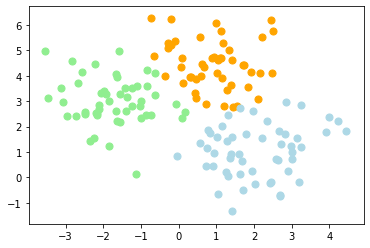

In [37]:
plt.scatter(x[y_gr == 0, 0], x[y_gr == 0, 1], s=50, c='lightgreen', label='cls 0')
plt.scatter(x[y_gr == 1, 0], x[y_gr == 1, 1], s=50, c='orange', label='cls 1')
plt.scatter(x[y_gr == 2, 0], x[y_gr == 2, 1], s=50, c='lightblue', label='cls 2')

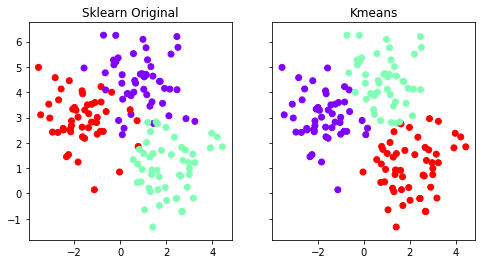

In [51]:
f, (ax1, ax2) = plt.subplots(1,2,sharey=True, figsize=(8,4))
ax1.set_title('Sklearn Original')
ax1.scatter(x[:,0], x[:,1], c=y, cmap='rainbow')
ax2.set_title('Kmeans')
ax2.scatter(x[:,0], x[:,1], c=y_gr, cmap='rainbow')

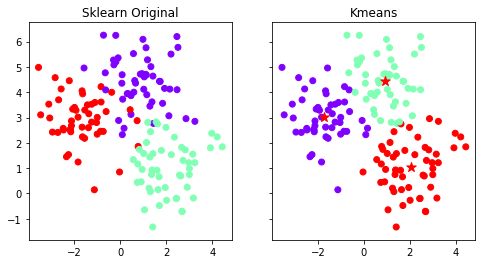

In [73]:
km = KMeans(n_clusters=3,
      init='random',
      max_iter = 300,
      random_state=0)

y_gr = km.fit_predict(x)

f, (ax1, ax2) = plt.subplots(1,2,sharey=True, figsize=(8,4))
ax1.set_title('Sklearn Original')
ax1.scatter(x[:,0], x[:,1], c=y, cmap='rainbow')
ax2.set_title('Kmeans')
ax2.scatter(x[:,0], x[:,1], c=y_gr, cmap='rainbow')
ax2.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='*', c='red', s=100)

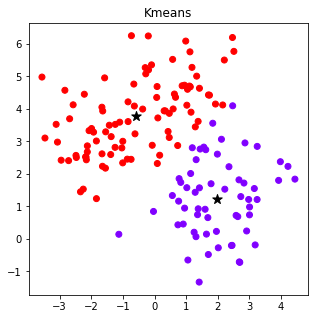

In [80]:
km = KMeans(n_clusters=2,
      init='random',
      max_iter = 300,
      random_state=0)

y_gr = km.fit_predict(x)

f, (ax1) = plt.subplots(1,1 ,sharey=True, figsize=(5,5))

ax1.set_title('Kmeans')
ax1.scatter(x[:,0], x[:,1], c=y_gr, cmap='rainbow')
ax1.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], \
            marker='*', c='black', s=100)

In [81]:
# inertia_ : group 내의 평균편차, group의 응집도

In [82]:
km.inertia_

475.5993797609488

In [83]:
inertias = []

for i in range(1, 11):
    km = KMeans(n_clusters=i,
               init='random',
               random_state=0)
    km.fit(x)
    inertias.append(km.inertia_)

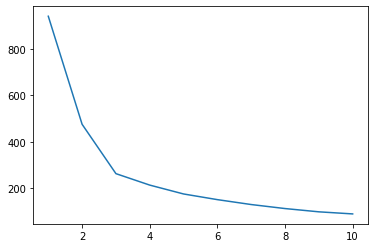

In [92]:
plt.figure()
plt.plot(range(1,len(inertias)+1),inertias)
plt.show()

In [94]:
# silhouette
# * a - 특정 점의 군집 내에서 모든 점과의 평균 거리..
# * b - 특정 점의 가장 가까운 군집의 모든 점과의 평균 거리..
# * silhouette = (b-a)/max(a,b)

In [114]:
km = KMeans(n_clusters = 3,
           init = 'random',
           random_state=0)
y_km = km.fit_predict(x)

In [115]:
y_km

array([2, 0, 1, 1, 2, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2,
       1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2,
       2, 2, 0, 2, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 0,
       0, 2, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1,
       0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 2, 2, 1, 0, 0, 0, 2, 2])

In [116]:
from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
silhouette_vals


array([ 0.53781518,  0.10947906,  0.59910147,  0.47048417,  0.60431069,
        0.5642907 ,  0.51949036,  0.60168139,  0.63668051,  0.51175652,
        0.34014068,  0.29495712,  0.66657475,  0.48556116,  0.16137138,
        0.65640762,  0.54321119,  0.64486415,  0.644637  ,  0.63875508,
        0.4502684 ,  0.52357275,  0.46368129,  0.57578683,  0.51913921,
        0.65037769,  0.50358324,  0.08096531,  0.37601258,  0.53807778,
        0.4602494 ,  0.67023113,  0.44296299,  0.62663282,  0.37268299,
        0.09170521,  0.43576165,  0.49795876,  0.46301381,  0.64549261,
        0.10418303,  0.4932419 ,  0.37437946,  0.60920409,  0.56374026,
        0.6354303 ,  0.30806839,  0.17442373,  0.48185825,  0.54256475,
       -0.05875494,  0.43368276,  0.62383924,  0.644477  ,  0.59840364,
        0.58278649,  0.27731273,  0.32211586,  0.09654969,  0.61846343,
        0.57407113,  0.3214746 ,  0.6538271 ,  0.59697758,  0.60243844,
        0.26559327,  0.65578745,  0.16001389,  0.18204705,  0.25

In [100]:
len(silhouette_vals)

150

In [101]:
np.mean(silhouette_vals)

0.47664957435042044

In [171]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples = 150,
                 n_features = 2,
                 centers = 3,
                 shuffle=True,
                    cluster_std=0.5,
                 random_state=0)

0.5848706144251782
0.7143417887288687
0.5742561778148089
0.45388263911219817
0.4680414496895857
0.3056017396818767
0.3342181524676488
0.32488538834712244
0.35039622248271846


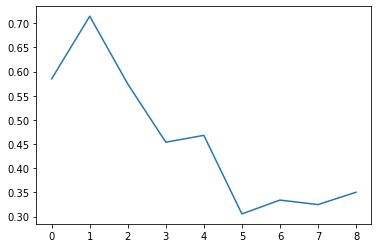

In [172]:
silhouettes = []

for i in range(2, 11):
    km = KMeans(n_clusters=i,
               init='random',
               random_state=0)
    y_km = km.fit_predict(x)
    silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
    print(np.mean(silhouette_vals))
    silhouettes.append(np.mean(silhouette_vals))

plt.plot(silhouettes)
plt.show()

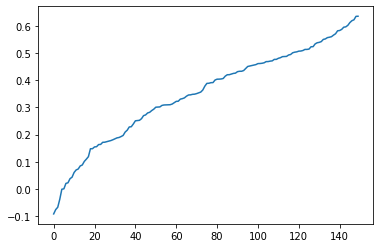

In [173]:
plt.plot(range(len(silhouette_vals)), sorted(silhouette_vals))

In [182]:
km = KMeans(n_clusters = 3,
           init = 'random',
           random_state=0)
y_km = km.fit_predict(x)

In [183]:
silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
np.mean(silhouette_vals)

0.7143417887288687

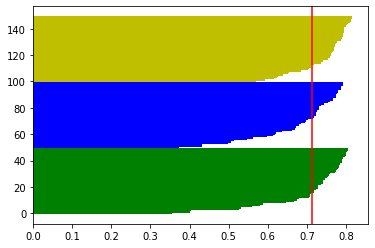

In [184]:
clist = ['g','b','y']
cluster_labels = np.unique(y_km)

y_ax_upper = 0
y_ax_lower = 0

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
            edgecolor='none', color=clist[i])
    
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red')

In [177]:
km = KMeans(n_clusters = 2,
           init = 'random',
           random_state=0)
y_km = km.fit_predict(x)

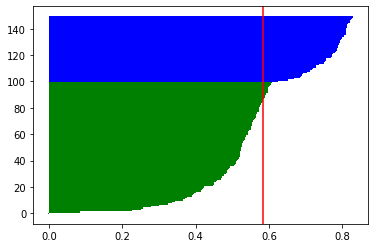

In [178]:
silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
silhouette_vals

clist = ['g','b','y']
cluster_labels = np.unique(y_km)

y_ax_upper = 0
y_ax_lower = 0

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
            edgecolor='none', color=clist[i])
    
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red')

In [186]:
# Hierachical Clustering

# 1. 모든 데이터의 거리행렬을 계산
# 2. 가장 가까운 데이터를 하나의 군집으로 뭉친다
# 3. 다시 거래행렬을 계산해서 업데이트
# 4. 가장 가까운 군집을 하나로 뭉친다
# 5. 하나의 군집이 될 때까지 위의 과정을 반복한다.

In [ ]:
# anaconda cmd > pip install mglearn

In [187]:
import mglearn

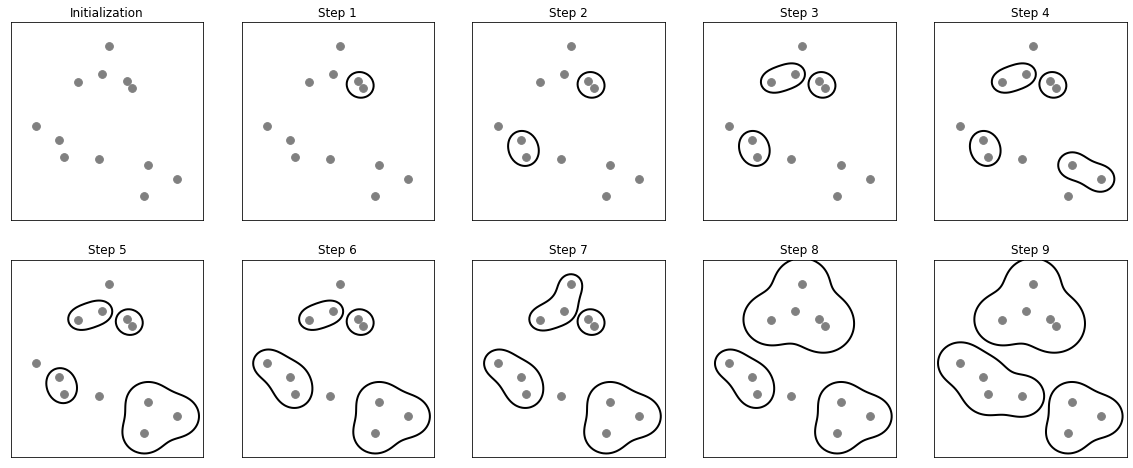

In [134]:
mglearn.plots.plot_agglomerative_algorithm()

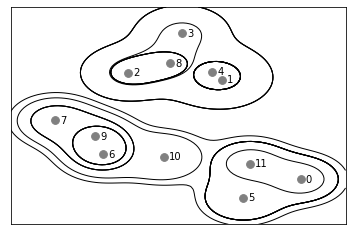

In [189]:
mglearn.plots.plot_agglomerative()

In [191]:
from sklearn.cluster import AgglomerativeClustering

x, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters = 3)
agg_y = agg.fit_predict(x)
print(agg_y)

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


Text(0.5, 0, 'feature 1')

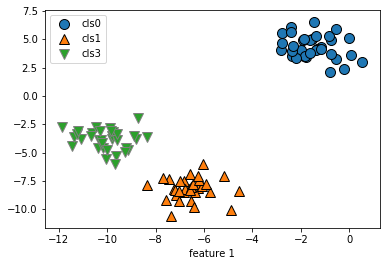

In [193]:
mglearn.discrete_scatter(x[:,0], x[:,1], agg_y)
plt.legend(['cls0','cls1','cls3'])
plt.xlabel('feature 0')
plt.xlabel('feature 1')

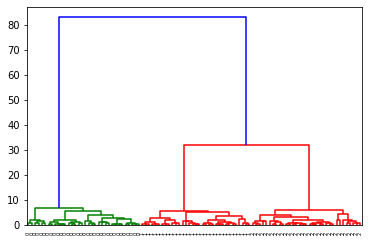

In [195]:
from scipy.cluster.hierarchy import dendrogram, ward

linkage_array = ward(x)

row_dendr = dendrogram(linkage_array,
                      labels=y)
plt.show()

In [197]:
### 밀도기반 클러서터링 : DBSCAN
# 1. 밀도 - 특정 반지름 내 점(데이터)들의 수..
# 2. 중심점 - 특정 반지름 내에 설정한 점의 수(MinPts) 이상의 점들이 있으면 그 점은 중심점.
# 3. 경계점 - 특정 반지금 내에 설정한 점의 수 미만의 점들이 있지만 다른 중심점의 특정 
#  반지름 내에 존재하는 점.
# 4. 잡음점 -  중심점도 경계점도 아닌 다른 점들..

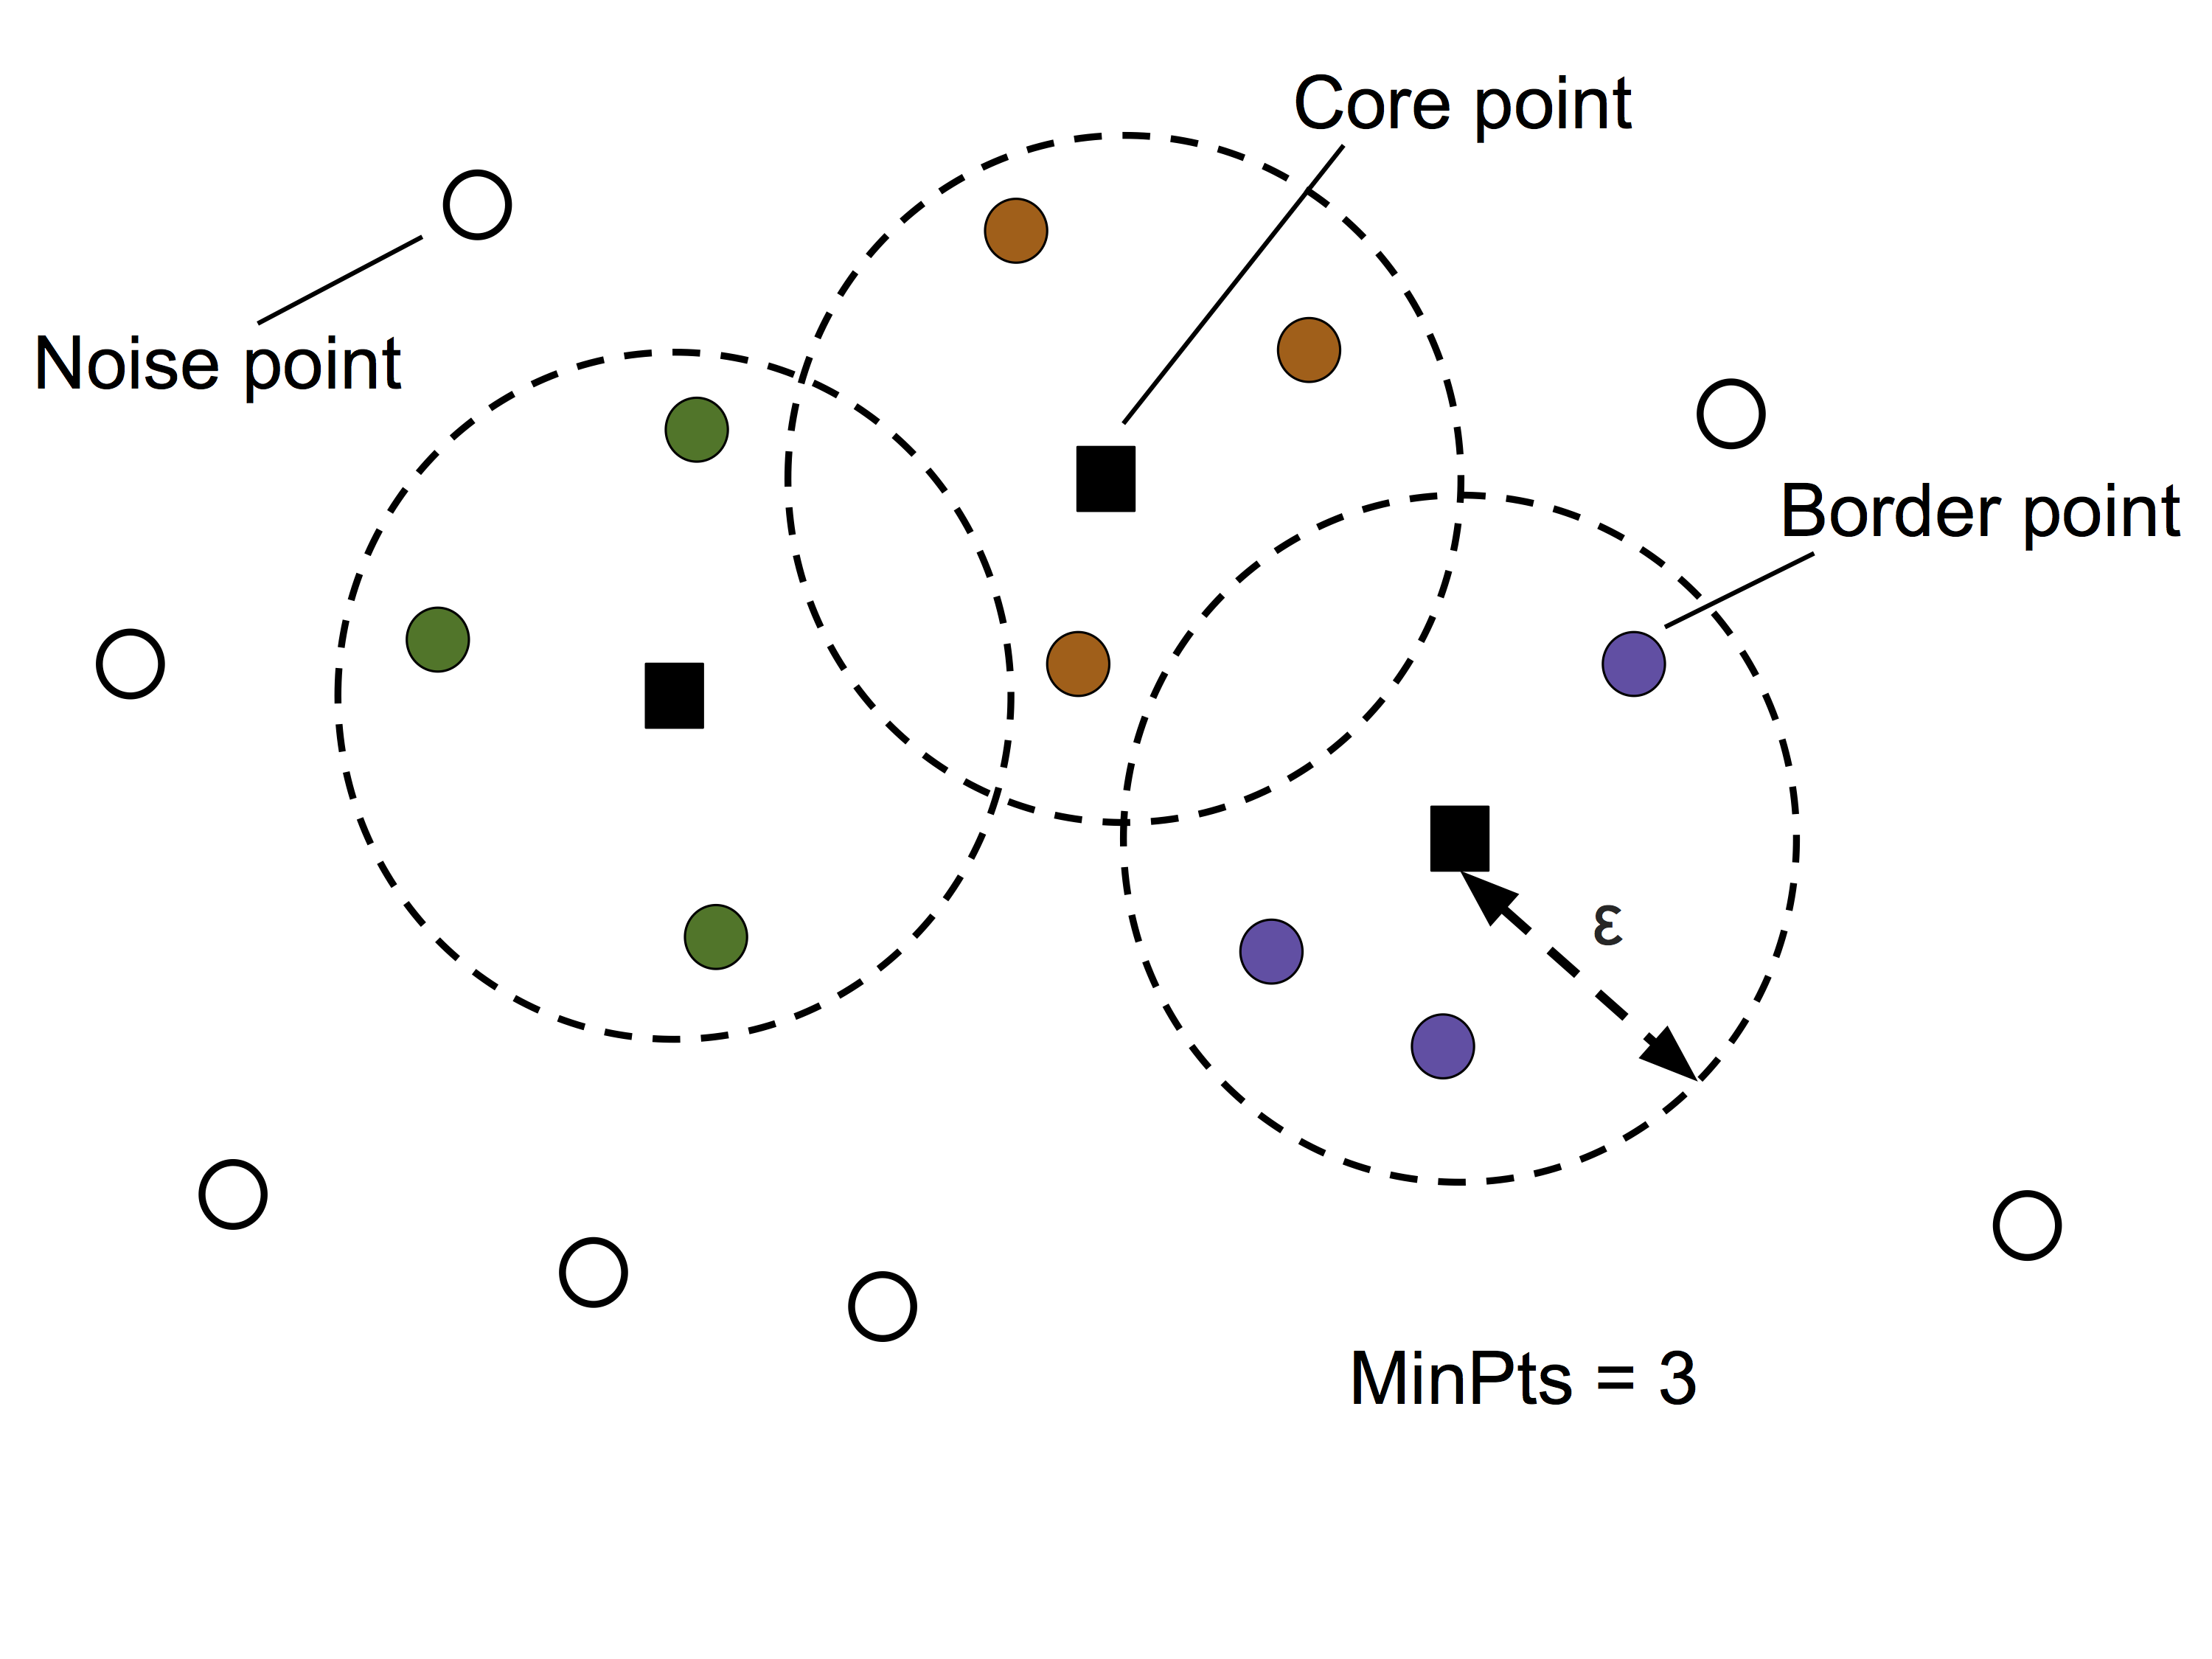

In [201]:
from IPython.display import Image
Image(filename = './ml_files/11_13.png', width=500)

In [204]:
from sklearn.datasets import make_moons

x,y = make_moons(n_samples=200, noise= 0.05, random_state=0)
x[:5]

array([[ 0.81680544,  0.5216447 ],
       [ 1.61859642, -0.37982927],
       [-0.02126953,  0.27372826],
       [-1.02181041, -0.07543984],
       [ 1.76654633, -0.17069874]])

In [205]:
y[:10]

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

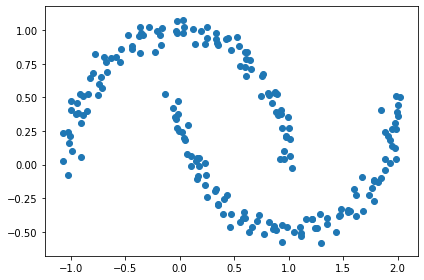

In [206]:
plt.scatter(x[:,0], x[:, 1])
plt.tight_layout()
plt.show()

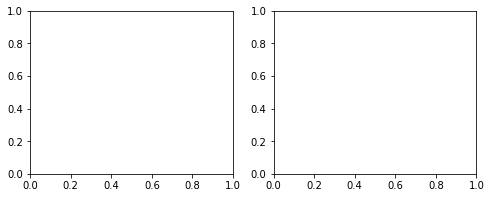

In [212]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3))

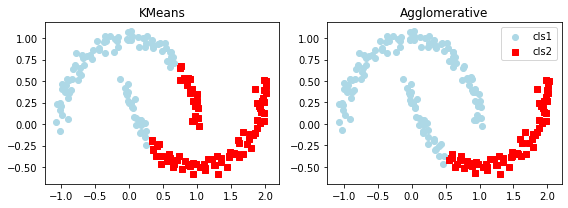

In [221]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(x)

ax1.scatter(x[y_km == 0][:,0], x[y_km == 0][:, 1], c = 'lightblue', marker='o', \
            label='cls1')
ax1.scatter(x[y_km == 1][:,0], x[y_km == 1][:, 1], c = 'red', marker='s', label='cls2')
ax1.set_title('KMeans')

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_ac = ac.fit_predict(x)

ax2.scatter(x[y_ac == 0][:,0], x[y_ac == 0][:, 1], c = 'lightblue', marker='o', \
            label='cls1')
ax2.scatter(x[y_ac == 1][:,0], x[y_ac == 1][:, 1], c = 'red', marker='s', label='cls2')
ax2.set_title('Agglomerative')

plt.legend()
plt.tight_layout()
plt.show()

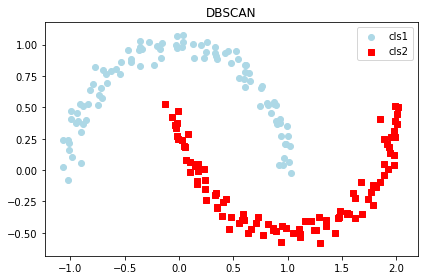

In [223]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(x)

plt.scatter(x[y_db == 0][:,0], x[y_db == 0][:, 1], c = 'lightblue', marker='o', \
            label='cls1')
plt.scatter(x[y_db == 1][:,0], x[y_db == 1][:, 1], c = 'red', marker='s', label='cls2')

plt.title('DBSCAN')
plt.legend()
plt.tight_layout()
plt.show()

In [229]:
from sklearn.metrics.cluster import silhouette_score

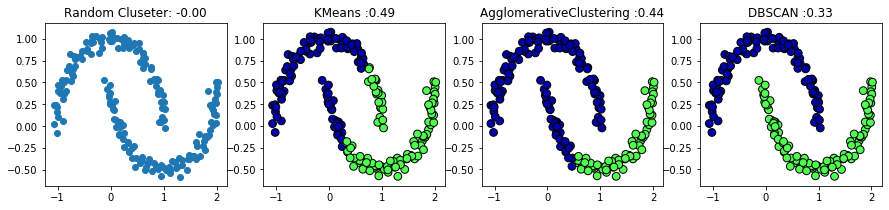

In [234]:
fig, axes = plt.subplots(1,4, figsize=(15,3))

y= np.random.randint(low=0, high=2, size=len(x))

axes[0].scatter(x[:,0], x[:,1], cmap=mglearn.cm3)
axes[0].set_title('Random Cluseter: {:.2f}'.format(silhouette_score(x,y)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), \
             DBSCAN(eps=0.2, min_samples=5, metric='euclidean')]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(x)
    ax.scatter(x[:,0], x[:,1], c=clusters, cmap=mglearn.cm3, s=60, \
              edgecolors='black')
    ax.set_title("{} :{:.2f}".format(algorithm.__class__.__name__, \
                                    silhouette_score(x, clusters)))